# Описание проекта

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

<b>Тариф «Смарт»</b>


1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
   
<b>Тариф «Ультра»</b>


1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей

<b>Примечание:</b>

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.


Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from scipy import stats as st

calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv', index_col = 'Unnamed: 0')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')
datasets = [calls, internet, messages, tariffs, users]

### Отчет по датасету <b>'calls'</b>

In [2]:
pandas_profiling.ProfileReport(calls)

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Отчет по датасету <b>'internet'</b>

In [3]:
pandas_profiling.ProfileReport(internet)

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Отчет по датасету <b>'messages'</b>

In [4]:
pandas_profiling.ProfileReport(messages)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Отчет по датасету <b>'tariffs'</b>

In [5]:
pandas_profiling.ProfileReport(tariffs)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Отчет по датасету <b>'users'</b>

In [6]:
pandas_profiling.ProfileReport(users)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Пропущенные значения имеются лишь в одном столбце 'churn_date' в датасете 'users'. Этот параметр отображает дату прекращения использования тарифа, если значение пропущено, значит данный клиент все еще пользовался тарифом на момент выгрузки данных. Оставим эти пропущенные значения, они имеют смысл.

## Изменение типов данных

Плата за тариф взимается 1 раз в месяц, соответственно и продолжительность разговоров (в минутах), количество сообщений, количество интернет-трафика учитывается за месяц. Для того, чтобы отслеживать эти данные с точностью до месяцев, необходимо в таблицах <b>calls, internet, messages</b> изменить тип данных в столбцах <b>call_date, session_date, message_date</b> соответственно на тип <b>'datetime64'</b>.

Также в таблице <b>users</b> необходимо изменить тип данных столбцов <b>churn_date, reg_date</b> на тип <b>datetime64</b>.

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [8]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [9]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [10]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='ignore')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Тип данных изменен.

## Анализ данных на ошибки и аномалии

### Таблица звонков 'calls'

Рассмотрим каждую таблицу подробнее. Первая - <b>calls</b>. Для начала приведем значения столбца <b>'duration'</b> к принципу нашего оператора: округлять длительность звонков в большую сторону.

In [11]:
calls['duration'] = np.ceil(calls['duration'])
calls.head()

id  call_date  duration  user_id
0  1000_0 2018-07-25       0.0     1000
1  1000_1 2018-08-17       0.0     1000
2  1000_2 2018-06-11       3.0     1000
3  1000_3 2018-09-21      14.0     1000
4  1000_4 2018-12-15       6.0     1000

In [12]:
calls.head(50)

id  call_date  duration  user_id
0    1000_0 2018-07-25       0.0     1000
1    1000_1 2018-08-17       0.0     1000
2    1000_2 2018-06-11       3.0     1000
3    1000_3 2018-09-21      14.0     1000
4    1000_4 2018-12-15       6.0     1000
5    1000_5 2018-11-02       0.0     1000
6    1000_6 2018-10-18       0.0     1000
7    1000_7 2018-08-22      19.0     1000
8    1000_8 2018-09-15      19.0     1000
9    1000_9 2018-08-15       0.0     1000
10  1000_10 2018-08-22       6.0     1000
11  1000_11 2018-05-28      19.0     1000
12  1000_12 2018-07-05       3.0     1000
13  1000_13 2018-09-29       8.0     1000
14  1000_14 2018-12-11      10.0     1000
15  1000_15 2018-07-27      10.0     1000
16  1000_16 2018-08-11       5.0     1000
17  1000_17 2018-08-02      13.0     1000
18  1000_18 2018-06-15       5.0     1000
19  1000_19 2018-11-02      16.0     1000
20  1000_20 2018-10-18       8.0     1000
21  1000_21 2018-09-21       9.0     1000
22  1000_22 2018-12-04       2.0     1000
23  1000_23 2018-08-20      10.0     1000
24  1000_24 2018-09-25      13.0     1000
25  1000_25 2018-07-21      15.0     1000
26  1000_26 2018-08-27       5.0     1000
27  1000_27 2018-08-25      11.0     1000
28  1000_28 2018-12-12      24.0     1000
29  1000_29 2018-07-19      12.0     1000
30  1000_30 2018-11-14      12.0     1000
31  1000_31 2018-11-14       8.0     1000
32  1000_32 2018-12-26      15.0     1000
33  1000_33 2018-12-02       2.0     1000
34  1000_34 2018-10-08      23.0     1000
35  1000_35 2018-09-23       9.0     1000
36  1000_36 2018-10-09       0.0     1000
37  1000_37 2018-08-15       7.0     1000
38  1000_38 2018-05-25       0.0     1000
39  1000_39 2018-06-13       0.0     1000
40  1000_40 2018-10-25       0.0     1000
41  1000_41 2018-12-29       7.0     1000
42  1000_42 2018-07-12       2.0     1000
43  1000_43 2018-11-20      10.0     1000
44  1000_44 2018-06-05       7.0     1000
45  1000_45 2018-10-13      11.0     1000
46  1000_46 2018-06-26       8.0     1000
47  1000_47 2018-07-14       0.0     1000
48  1000_48 2018-07-20      11.0     1000
49  1000_49 2018-09-21       7.0     1000

In [13]:
calls.describe()

duration        user_id
count  202607.000000  202607.000000
mean        7.158198    1253.940619
std         5.959173     144.722751
min         0.000000    1000.000000
25%         2.000000    1126.000000
50%         6.000000    1260.000000
75%        11.000000    1379.000000
max        38.000000    1499.000000

Средняя длительность разговора: 7.15 мин.

Медиана длительности разговора: 6 мин.

Максимальная длительность разговора: 38 мин.

<b>Минимальная длительность разговора: 0 мин.</b>

Вспомним примечание к задаче, в котором написано: <b>Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.</b>

Но мы видим нулевые значения, это странно, вероятнее всего это <b>пропущенные звонки</b>, клиент просто не дозвонился.

Необходимо устранить эту <b>'аномалию'</b>, можно сделать это несколькими способами:

- Заполнить эти значения медианой продолжительности разговора;
- Удалить данные с нулевой продолжительностью разговора;
- Оставить данные с нулевой длительностью.

Считаю, что правильным способом будет <b>удаление таких данных</b>, так как они изменяют показатели "средней продолжительности разговора" и "медианы продолжительности разговора", а также изменяют количество звонков в целом, что может отразиться на результатах анализа данных.

Средняя длительность звонков: 7.16
Медиана длительности звонков: 6.00
Стандартное отклонение: 5.96


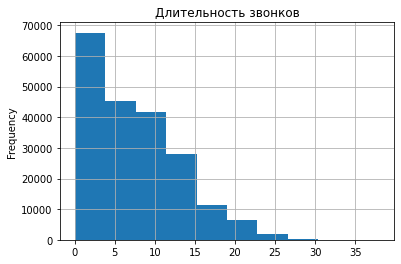

In [14]:
# Гистограмма длительности звонков учитывая нулевые значения
calls['duration'].plot(kind='hist', grid=True, title='Длительность звонков')
print('Средняя длительность звонков: {:.2f}'.format(calls['duration'].mean()))
print('Медиана длительности звонков: {:.2f}'.format(calls['duration'].median()))
print('Стандартное отклонение: {:.2f}'.format(np.std(calls['duration'])))

Средняя длительность звонков: 8.90
Медиана длительности звонков: 8.00
Стандартное отклонение: 5.35


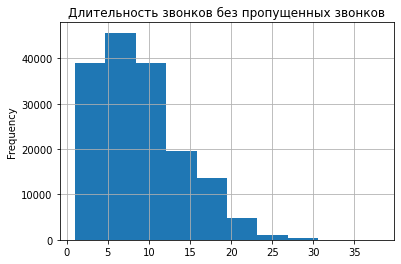

In [15]:
# Гистограмма длительности звонков не учитывая нулевые значения
calls.query('duration > 0')['duration'].plot(kind='hist', grid=True, title='Длительность звонков без пропущенных звонков')
print('Средняя длительность звонков: {:.2f}'.format(calls.query('duration > 0')['duration'].mean()))
print('Медиана длительности звонков: {:.2f}'.format(calls.query('duration > 0')['duration'].median()))
print('Стандартное отклонение: {:.2f}'.format(np.std(calls.query('duration > 0')['duration'])))

Среднее значение, медиана, а также стандартное отклонение заметно меняются, если не учитывать "пропущенные звонки", а также распределение длительности звонков стремится к нормальному.

Подведем итог после удаления данных:

- Средняя длительность и медиана увеличились, очевидно, что они стали более правдоподобными;
- Стандартное отклонение уменьшилось;
- Количество "полноценных" звонков теперь действительно.

Единственный минус данного способа: мы удалили часть звонков, пускай они и пропущенные (пустые), но их количество может нам рассказать об активности "пользователя". В любом случае, активность могла бы дать нам лишь догадки о количестве звонков пользователя, например, в следующем месяце. В нашем случае мы анализируем использованное количество минут.

In [16]:
calls = calls.query('duration > 0').reset_index(drop=True)

In [17]:
print('Количество строк после удаления "пропущенных звонков": {}'.format(calls.shape[0]))

Количество строк после удаления "пропущенных звонков": 162994


### Таблица интернет трафика 'internet'

Вторая таблица для подробного рассмотрения - <b>internet</b>.

In [18]:
internet.head(50)

id  mb_used session_date  user_id
0    1000_0   112.95   2018-11-25     1000
1    1000_1  1052.81   2018-09-07     1000
2    1000_2  1197.26   2018-06-25     1000
3    1000_3   550.27   2018-08-22     1000
4    1000_4   302.56   2018-09-24     1000
5    1000_5   399.97   2018-10-02     1000
6    1000_6   540.08   2018-09-07     1000
7    1000_7   415.70   2018-07-11     1000
8    1000_8   505.40   2018-10-08     1000
9    1000_9   345.54   2018-09-03     1000
10  1000_10   385.14   2018-09-27     1000
11  1000_11     0.00   2018-08-28     1000
12  1000_12   375.87   2018-06-20     1000
13  1000_13   393.83   2018-08-09     1000
14  1000_14   180.64   2018-08-11     1000
15  1000_15   337.71   2018-07-21     1000
16  1000_16   459.28   2018-06-09     1000
17  1000_17   204.14   2018-06-03     1000
18  1000_18   658.10   2018-11-01     1000
19  1000_19   452.73   2018-11-28     1000
20  1000_20   336.96   2018-08-20     1000
21  1000_21   564.37   2018-12-06     1000
22  1000_22   723.38   2018-07-02     1000
23  1000_23   603.61   2018-10-19     1000
24  1000_24    53.18   2018-10-30     1000
25  1000_25   153.44   2018-06-17     1000
26  1000_26   951.38   2018-11-06     1000
27  1000_27   799.91   2018-08-28     1000
28  1000_28   923.89   2018-09-14     1000
29  1000_29   622.43   2018-11-15     1000
30  1000_30   577.19   2018-06-09     1000
31  1000_31   506.48   2018-11-06     1000
32  1000_32   571.41   2018-08-26     1000
33  1000_33   432.34   2018-10-15     1000
34  1000_34   533.64   2018-09-24     1000
35  1000_35   660.31   2018-08-28     1000
36  1000_36  1249.74   2018-11-06     1000
37  1000_37   747.58   2018-06-03     1000
38  1000_38     0.00   2018-11-27     1000
39  1000_39   142.75   2018-10-17     1000
40  1000_40   575.19   2018-10-07     1000
41  1000_41   724.48   2018-08-05     1000
42  1000_42   558.38   2018-07-06     1000
43  1000_43   555.63   2018-10-03     1000
44  1000_44   546.02   2018-09-07     1000
45  1000_45   549.20   2018-11-02     1000
46  1000_46     0.00   2018-06-30     1000
47  1000_47   197.93   2018-11-17     1000
48  1000_48   210.52   2018-06-06     1000
49  1000_49   629.12   2018-11-20     1000

In [19]:
internet.describe()

mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000

В данной таблице мы также можем наблюдать <b>"нулевые" сессии</b> - потраченный интернет трафик составляет 0.0. Я считаю, что в действительности такое невозможно, ведь, сессия записывается, когда пользователь запускает какое-либо приложение, использующее интернет. Как правило, такие приложения начинают использовать трафик сразу же после запуска, соответственно, пускай хоть это будет 1 Кбайт, но он будет использован. <b>Использованный трафик не может быть равен 0.</b>

Соответственно, считаю правильным <b>удалить сессии, в которых было использовано 0 инетрнет трафика</b>, ведь такие еще и искажают дальнейшие значения, полученные с помощью анализа данных.

Средняя длительность звонков: 370.19
Медиана длительности звонков: 348.01
Стандартное отклонение: 278.30


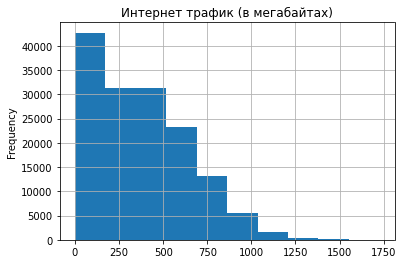

In [20]:
# Гистограмма использования интернет трафика учитывая нулевые значения
internet['mb_used'].plot(kind='hist', grid=True, title='Интернет трафик (в мегабайтах)')
print('Средняя длительность звонков: {:.2f}'.format(internet['mb_used'].mean()))
print('Медиана длительности звонков: {:.2f}'.format(internet['mb_used'].median()))
print('Стандартное отклонение: {:.2f}'.format(np.std(internet['mb_used'])))

Средняя длительность звонков: 426.09
Медиана длительности звонков: 400.54
Стандартное отклонение: 255.60


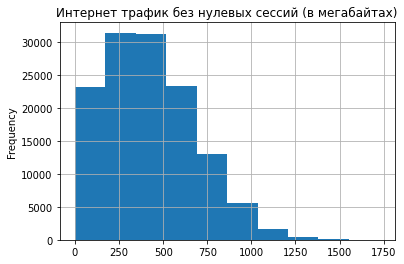

In [21]:
# Гистограмма использования интернет трафика не учитывая нулевые значения
internet.query('mb_used > 0')['mb_used'].plot(kind='hist', grid=True, title='Интернет трафик без нулевых сессий (в мегабайтах)')
print('Средняя длительность звонков: {:.2f}'.format(internet.query('mb_used > 0')['mb_used'].mean()))
print('Медиана длительности звонков: {:.2f}'.format(internet.query('mb_used > 0')['mb_used'].median()))
print('Стандартное отклонение: {:.2f}'.format(np.std(internet.query('mb_used > 0')['mb_used'])))

Мы можем наблюдать те же изменения, что и для таблицы "звонков", средний использованный интернет трафик и его медиана увеличилась, а стандартное отклонение уменшилось. А также распределение стремится к нормальному.

In [22]:
internet = internet.query('mb_used > 0').reset_index(drop=True)
internet.head()

id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000

### Таблица сообщений 'messages'

Следующая таблица для рассмотрения - <b>messages</b>

In [23]:
messages.head(50)

id message_date  user_id
0    1000_0   2018-06-27     1000
1    1000_1   2018-10-08     1000
2    1000_2   2018-08-04     1000
3    1000_3   2018-06-16     1000
4    1000_4   2018-12-05     1000
5    1000_5   2018-06-20     1000
6    1000_6   2018-11-19     1000
7    1000_7   2018-10-29     1000
8    1000_8   2018-06-25     1000
9    1000_9   2018-12-18     1000
10  1000_10   2018-05-30     1000
11  1000_11   2018-07-06     1000
12  1000_12   2018-08-20     1000
13  1000_13   2018-10-30     1000
14  1000_14   2018-09-14     1000
15  1000_15   2018-08-28     1000
16  1000_16   2018-06-25     1000
17  1000_17   2018-06-29     1000
18  1000_18   2018-07-07     1000
19  1000_19   2018-05-29     1000
20  1000_20   2018-05-28     1000
21  1000_21   2018-08-15     1000
22  1000_22   2018-07-29     1000
23  1000_23   2018-12-07     1000
24  1000_24   2018-12-25     1000
25  1000_25   2018-10-31     1000
26  1000_26   2018-07-29     1000
27  1000_27   2018-07-30     1000
28  1000_28   2018-11-05     1000
29  1000_29   2018-12-15     1000
30  1000_30   2018-12-04     1000
31  1000_31   2018-06-30     1000
32  1000_32   2018-07-07     1000
33  1000_33   2018-12-22     1000
34  1000_34   2018-10-02     1000
35  1000_35   2018-08-29     1000
36  1000_36   2018-08-15     1000
37  1000_37   2018-12-07     1000
38  1000_38   2018-11-05     1000
39  1000_39   2018-09-09     1000
40  1000_40   2018-07-19     1000
41  1000_41   2018-09-04     1000
42  1000_42   2018-07-15     1000
43  1000_43   2018-10-25     1000
44  1000_44   2018-12-04     1000
45  1000_45   2018-12-08     1000
46  1000_46   2018-06-01     1000
47  1000_47   2018-06-12     1000
48  1000_48   2018-12-21     1000
49  1000_49   2018-10-07     1000

In [24]:
messages.describe()

user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000

В данной таблице нет проблем с данными. В ней приведены лишь даты отправления сообщений.

### Таблица пользователей 'users'

In [25]:
users.head(50)

user_id  age churn_date              city  first_name     last_name  \
0      1000   52        NaT         Краснодар      Рафаил     Верещагин   
1      1001   41        NaT            Москва        Иван          Ежов   
2      1002   59        NaT       Стерлитамак     Евгений     Абрамович   
3      1003   23        NaT            Москва       Белла      Белякова   
4      1004   68        NaT       Новокузнецк     Татьяна      Авдеенко   
5      1005   67        NaT  Набережные Челны    Афанасий        Горлов   
6      1006   21        NaT         Ульяновск      Леонид      Ермолаев   
7      1007   65        NaT            Москва         Юна      Березина   
8      1008   63        NaT         Челябинск      Рустэм     Пономарёв   
9      1009   24        NaT             Пермь    Василиса       Блинова   
10     1010   26        NaT            Тюмень      Эдуард       Кононов   
11     1011   44        NaT            Самара    Веселина        Алёшко   
12     1012   38        NaT   Санкт-Петербург      Варлам      Соловьев   
13     1013   36        NaT           Иваново       Борис     Андреенко   
14     1014   64        NaT         Чебоксары        Яков      Акинфьев   
15     1015   26        NaT         Челябинск      Рузана       Алюшина   
16     1016   58        NaT              Омск      Марица      Сазонова   
17     1017   73        NaT         Краснодар       Мария    Аленникова   
18     1018   71        NaT               Уфа      Матвей       Золотов   
19     1019   63 2018-10-05             Томск     Игнатий       Круглов   
20     1020   59 2018-12-18              Чита        Тала       Костина   
21     1021   61        NaT         Краснодар   Святослав       Тихонов   
22     1022   72        NaT   Санкт-Петербург    Василиса     Трофимова   
23     1023   42        NaT             Томск     Людмила    Мельникова   
24     1024   73        NaT   Санкт-Петербург      Иулиан       Антипов   
25     1025   56        NaT               Уфа      Матвей        Акинин   
26     1026   32        NaT          Мурманск     Евгений       Бородин   
27     1027   62        NaT      Петрозаводск   Владислав        Авдеев   
28     1028   20        NaT             Тверь      Рустем        Евсеев   
29     1029   51        NaT      Екатеринбург     Алексей      Селезнев   
30     1030   28        NaT         Махачкала    Мариетта      Русанова   
31     1031   66        NaT            Москва   Лаврентий      Тимофеев   
32     1032   31        NaT         Ульяновск        Инна     Игнатьева   
33     1033   71        NaT            Москва         Лия     Бабушкина   
34     1034   66 2018-11-21           Вологда   Святослав      Бондарев   
35     1035   37        NaT            Тюмень     Розалия       Аракина   
36     1036   47        NaT   Санкт-Петербург    Анжелика     Андропова   
37     1037   73        NaT         Череповец     Изольда      Архипова   
38     1038   31        NaT            Москва       Мария      Денисова   
39     1039   40        NaT         Ярославль     Агнесса     Андреенко   
40     1040   23        NaT              Сочи        Юрий       Одинцов   
41     1041   58        NaT            Москва      Михаил       Кравцов   
42     1042   42        NaT         Хабаровск  Константин      Добрынин   
43     1043   69        NaT        Ставрополь    Марианна     Родионова   
44     1044   51        NaT            Рязань  Иннокентий         Рябов   
45     1045   48        NaT          Улан-Удэ      Джемма      Карасева   
46     1046   72        NaT              Тула   Екатерина  Александрова   
47     1047   67        NaT           Саратов      Милица     Меркулова   
48     1048   73        NaT       Новокузнецк        Лола     Мясникова   
49     1049   41        NaT            Москва    Габриель         Ларин   

     reg_date tariff  
0  2018-05-25  ultra  
1  2018-11-01  smart  
2  2018-06-17  smart  
3  2018-08-17  ultra  
4  2018-05-14  ultra  
5  2018-01-25  smart  
6  2018-02-26  sm

In [26]:
users.describe()

user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000

В данной таблице нет ничего необычного.

## Подсчет результатов для каждого пользователя

### Кол-во звонков и минут

Создадим функцию, которая принимает как аргумент сгруппированные по столбцу 'user_id' датафреймы из таблицы <b>calls</b>. К каждому датафрейму добавляется столбец <b>'month'</b>. Далее формируется сводная таблица, за индекс она принимает месяца, а за значения "длительность разговора", функция сводной таблицы - суммирование и подсчет количества значений. Для удобства отображения информации изменим названия столбцов сводной таблицы на 'duration' и 'calls_count' соответственно. Фукнция <b>возвращает сводную таблицу</b>.

Далее в переменной <b>calls_by_month</b> сохраняется общая сводная таблица по всем 'user_id'. Так как индексация в сводных таблицах внутри функции проходила по месяцам, соответственно, месяц будет являться индексом, используем метод reset_index() с параметром level='month', чтобы сделать месяца столбцом. Проверяем результат.

In [27]:
def calls_months(grouped_calls):
    grouped_calls['month'] = grouped_calls['call_date'].dt.month
    calls_by_month = grouped_calls.pivot_table(index='month', values='duration', aggfunc=['sum', 'count'])
    calls_by_month.columns = ['duration', 'calls_count']
    return calls_by_month

calls_by_month = calls.groupby('user_id').apply(calls_months)
calls_by_month.reset_index(level='month', inplace=True)
calls_by_month

month  duration  calls_count
user_id                              
1000         5     159.0           17
1000         6     172.0           28
1000         7     340.0           41
1000         8     408.0           42
1000         9     466.0           46
...        ...       ...          ...
1498        10     247.0           30
1499         9      70.0            8
1499        10     449.0           44
1499        11     612.0           62
1499        12     492.0           56

[3168 rows x 3 columns]

Таблица выглядет вполне приемлимо. Теперь у нас есть информация о звонках по каждому месяца для каждого пользователя.

### Кол-во сообщений по месяцам

Проделаем те же самые шаги, как и для звонков, единственное отличие будет заключаться в том, что функцией сводной таблицы будет являться только "подсчет".

Результат функции <b>messages_months</b> записывается в переменную <b>messages_by_month</b>. Далее проделываем те же шаги, что и для звонков. Проверяем результат.

In [28]:
def messages_months(grouped_messages):
    grouped_messages['month'] = grouped_messages['message_date'].dt.month
    messages_by_month = grouped_messages.pivot_table(index='month', values='message_date', aggfunc='count')
    messages_by_month.columns = ['messages_count']
    return messages_by_month

messages_by_month = messages.groupby('user_id').apply(messages_months)
messages_by_month.reset_index(level='month', inplace=True)
messages_by_month

month  messages_count
user_id                       
1000         5              22
1000         6              60
1000         7              75
1000         8              81
1000         9              57
...        ...             ...
1498        10              42
1499         9              11
1499        10              48
1499        11              59
1499        12              66

[2717 rows x 2 columns]

Теперь у нас есть информация о количестве сообщений по месяцам для каждого пользователя.

### Объем интернет-трафика по месяцам

С интернет-трафиком сделаем все по той же схеме, только функция сводной таблицы уже будет заключаться в суммировании, после этого переводим значения "МегаБайтов" в "ГигаБайты" и округляем в большую сторону, также изменяем название столбца.

Записываем результат функции в переменную <b>internet_by_month</b>. Проверяем результат.

In [29]:
def internet_months(grouped_internet):
    grouped_internet['month'] = grouped_internet['session_date'].dt.month
    internet_by_month = (grouped_internet.pivot_table(index='month', values='mb_used', aggfunc='sum') / 1024).apply(np.ceil)
    internet_by_month.columns = ['gb_used']
    return internet_by_month

internet_by_month = internet.groupby('user_id').apply(internet_months)
internet_by_month.reset_index(level='month', inplace=True)
internet_by_month

month  gb_used
user_id                
1000         5      3.0
1000         6     23.0
1000         7     14.0
1000         8     14.0
1000         9     15.0
...        ...      ...
1498        10     21.0
1499         9      2.0
1499        10     18.0
1499        11     18.0
1499        12     13.0

[3201 rows x 2 columns]

Теперь у нас есть информация об использованном интернет-трафике по каждому месяцу для каждого пользователя.

### Подсчет помесячной выручки

Для подсчета помесячной выручки сделаем следующее: вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

<b>Но</b> для начала соединим наши сводные таблицы по столбцам 'user_id' и 'month'. Заметим, что в выборке, оказывается, присутствуют пользователи, которые, например, вовсе не отправляли сообщения или не звонили, или же не использовали интернет-трафик, соответственно, в методе merge() в качестве аргумента <b>how</b> мы укажем способ <b>'outer'</b>, в таком случае в конечном датафрейме будут находиться все пользователи, а для тех, кто не использовал какую-либо услугу, этот показатель будет являться NaN. Запишем общий датафрейм в переменную c_m_i_by_month, где c - calls, m - messages, i - internet, отсортируем датафрейм по индексу. А затем присоединим к ней таблицу 'users' для определения тарифного плана.

In [30]:
c_m_i_by_month = calls_by_month.merge(messages_by_month, on=['user_id', 'month'], how='outer').merge(internet_by_month, on=['user_id', 'month'], how='outer')
c_m_i_by_month = c_m_i_by_month.merge(users, on='user_id')
c_m_i_by_month = c_m_i_by_month.set_index('user_id')
c_m_i_by_month

month  duration  calls_count  messages_count  gb_used  age  \
user_id                                                               
1000         5     159.0         17.0            22.0      3.0   52   
1000         6     172.0         28.0            60.0     23.0   52   
1000         7     340.0         41.0            75.0     14.0   52   
1000         8     408.0         42.0            81.0     14.0   52   
1000         9     466.0         46.0            57.0     15.0   52   
...        ...       ...          ...             ...      ...  ...   
1489         8       NaN          NaN            17.0     11.0   35   
1489         9       NaN          NaN            32.0     17.0   35   
1489        10       NaN          NaN            21.0     20.0   35   
1489        11       NaN          NaN            20.0     18.0   35   
1489        12       NaN          NaN            35.0     17.0   35   

        churn_date             city first_name  last_name   reg_date tariff  
user_id                                                                      
1000           NaT        Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
1000           NaT        Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
1000           NaT        Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
1000           NaT        Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
1000           NaT        Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
...            ...              ...        ...        ...        ...    ...  
1489           NaT  Санкт-Петербург      Павел   Гончаров 2018-08-15  smart  
1489           NaT  Санкт-Петербург      Павел   Гончаров 2018-08-15  smart  
1489           NaT  Санкт-Петербург      Павел   Гончаров 2018-08-15  smart  
1489           NaT  Санкт-Петербург      Павел   Гончаров 2018-08-15  smart  
1489           NaT  Санкт-Петербург      Павел   Гончаров 2018-08-15  smart  

[3214 rows x 12 columns]

Получаем полноценный датафрейм, осталось лишь отсортировать по индексу.

In [31]:
c_m_i_by_month = c_m_i_by_month.sort_index(kind='stable')
c_m_i_by_month.reset_index(level='user_id', inplace=True)
c_m_i_by_month

user_id  month  duration  calls_count  messages_count  gb_used  age  \
0        1000      5     159.0         17.0            22.0      3.0   52   
1        1000      6     172.0         28.0            60.0     23.0   52   
2        1000      7     340.0         41.0            75.0     14.0   52   
3        1000      8     408.0         42.0            81.0     14.0   52   
4        1000      9     466.0         46.0            57.0     15.0   52   
...       ...    ...       ...          ...             ...      ...  ...   
3209     1498     10     247.0         30.0            42.0     21.0   68   
3210     1499      9      70.0          8.0            11.0      2.0   35   
3211     1499     10     449.0         44.0            48.0     18.0   35   
3212     1499     11     612.0         62.0            59.0     18.0   35   
3213     1499     12     492.0         56.0            66.0     13.0   35   

     churn_date         city first_name  last_name   reg_date tariff  
0           NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
1           NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
2           NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
3           NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
4           NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra  
...         ...          ...        ...        ...        ...    ...  
3209 2018-10-25  Владикавказ   Всеволод    Акимчин 2018-07-19  smart  
3210        NaT        Пермь     Гектор   Корнилов 2018-09-27  smart  
3211        NaT        Пермь     Гектор   Корнилов 2018-09-27  smart  
3212        NaT        Пермь     Гектор   Корнилов 2018-09-27  smart  
3213        NaT        Пермь     Гектор   Корнилов 2018-09-27  smart  

[3214 rows x 13 columns]

In [32]:
tariffs

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra

In [33]:
from tqdm import tqdm

for row in tqdm(range(c_m_i_by_month.shape[0])):
    grouped_tariff = c_m_i_by_month.loc[row, :]
    if c_m_i_by_month.loc[row, 'tariff'] == 'ultra':
        tariff = tariffs[tariffs['tariff_name'] == 'ultra']
    else:
        tariff = tariffs[tariffs['tariff_name'] == 'smart']
    over_minutes = c_m_i_by_month.loc[row, 'duration'] - int(tariff['minutes_included'])
    if np.isnan(over_minutes):
        c_m_i_by_month.loc[row, 'rubs_for_minutes'] = 0
    elif int(over_minutes) < 0:
        c_m_i_by_month.loc[row, 'rubs_for_minutes'] = 0
    else:
        c_m_i_by_month.loc[row, 'rubs_for_minutes'] = int(over_minutes) * int(tariff['rub_per_minute'])
    over_messages = c_m_i_by_month.loc[row, 'messages_count'] - int(tariff['messages_included'])
    if np.isnan(over_messages):
        c_m_i_by_month.loc[row, 'rubs_for_messages'] = 0
    elif int(over_messages) < 0:
        c_m_i_by_month.loc[row, 'rubs_for_messages'] = 0
    else:
        c_m_i_by_month.loc[row, 'rubs_for_messages'] = int(over_messages) * int(tariff['rub_per_message'])
    over_gbs = c_m_i_by_month.loc[row, 'gb_used'] - (int(tariff['mb_per_month_included']) / 1024)
    if np.isnan(over_gbs):
        c_m_i_by_month.loc[row, 'rubs_for_gbs'] = 0
    elif int(over_gbs) < 0:
        c_m_i_by_month.loc[row, 'rubs_for_gbs'] = 0
    else:
        c_m_i_by_month.loc[row, 'rubs_for_gbs'] = int(over_gbs) * int(tariff['rub_per_gb'])
    overall_profit = c_m_i_by_month.loc[row, 'rubs_for_minutes'] + c_m_i_by_month.loc[row, 'rubs_for_messages'] + c_m_i_by_month.loc[row, 'rubs_for_gbs'] + int(tariff['rub_monthly_fee'])
    c_m_i_by_month.loc[row, 'overall_profit'] = overall_profit
    

100%|██████████| 3214/3214 [00:07<00:00, 420.56it/s]


Обновляем датафрейм и проверяем результат.

In [34]:
c_m_i_by_month.head()

user_id  month  duration  calls_count  messages_count  gb_used  age  \
0     1000      5     159.0         17.0            22.0      3.0   52   
1     1000      6     172.0         28.0            60.0     23.0   52   
2     1000      7     340.0         41.0            75.0     14.0   52   
3     1000      8     408.0         42.0            81.0     14.0   52   
4     1000      9     466.0         46.0            57.0     15.0   52   

  churn_date       city first_name  last_name   reg_date tariff  \
0        NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
1        NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
2        NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
3        NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
4        NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   

   rubs_for_minutes  rubs_for_messages  rubs_for_gbs  overall_profit  
0               0.0                0.0           0.0          1950.0  
1               0.0                0.0           0.0          1950.0  
2               0.0                0.0           0.0          1950.0  
3               0.0                0.0           0.0          1950.0  
4               0.0                0.0           0.0          1950.0

Мы видим обновленный датафрейм с подсчитанной помесячной выручкой.

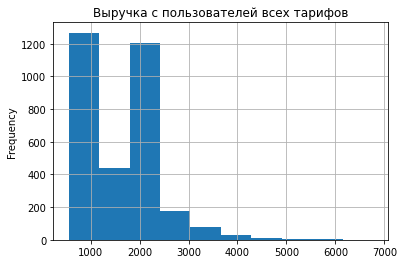

In [35]:
c_m_i_by_month['overall_profit'].plot(kind='hist', title='Выручка с пользователей всех тарифов', grid=True);

Как мы видим на гистограмме, большинство пользователей платят стандартный ежемесячный платеж по тарифам 500 и 1950 соответственно. Но есть и заядлые пользователи, которые умудряются тратить до 7000 рублей на сотовую связь.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [38]:
smart_clients = c_m_i_by_month.query('tariff == "smart"')
ultra_clients = c_m_i_by_month.query('tariff == "ultra"')

In [39]:
c_m_i_by_month.pivot_table(index='tariff',  
                 values=['duration', 'gb_used', 'messages_count'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

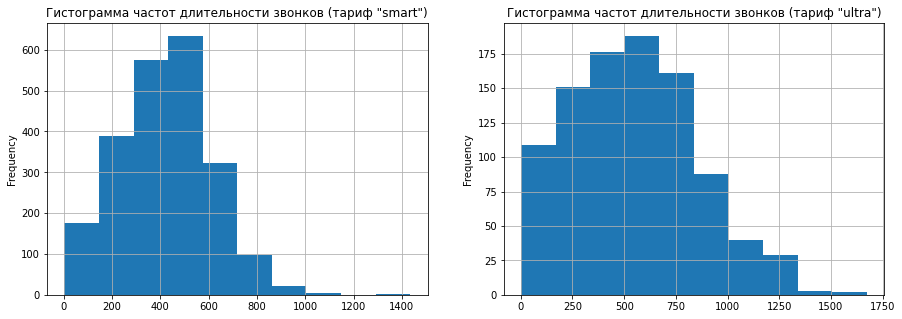

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(15,5))

smart_clients['duration'].plot(kind='hist', title='Гистограмма частот длительности звонков (тариф "smart")', grid=True, ax=axes[0]);
ultra_clients['duration'].plot(kind='hist', title='Гистограмма частот длительности звонков (тариф "ultra")', grid=True, ax=axes[1]);

<b>smart</b>

Данные близятся к нормальному распределению, но все равно, датасет является <b>отрицательно скошенным</b>. В целом, можно сказать, что большинство пользователей тарифа 'smart' укладываются в отметку в 500 бесплатных минут, включенных в стоимость тарифа.

<b>ultra</b>

Данные близятся к нормальному распределению, но все равно, датасет является <b>отрицательно скошенным</b>. В случае с тарифом 'ultra', где в стоимость тарифа включено 3000 минут бесплатного разговора в месяц, <b>никто из его пользователей не проговорил по телефону сверх лимита.</b>

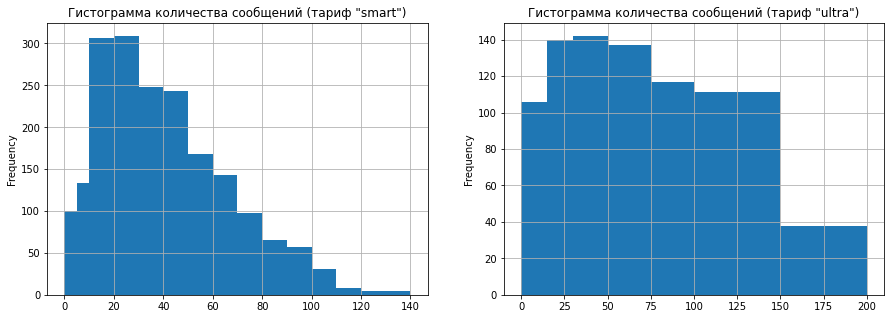

In [41]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

smart_clients['messages_count'].plot(bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140], kind='hist', title='Гистограмма количества сообщений (тариф "smart")', grid=True, ax=axes[0]);
ultra_clients['messages_count'].plot(bins=[0, 15, 30, 50, 75, 100, 150, 200], kind='hist', title='Гистограмма количества сообщений (тариф "ultra")', grid=True, ax=axes[1]);

<b>smart</b>

Датасет с <b>отрицательной скошенностью.</b> Опять же, большинство пользователей укладываются в лимит сообщений своего тарифа (50), после чего мы видим спад количества пользователей, которые отправляют больше 50 сообщений, но такие пользователи все равно есть, они как раз и приносят дополнительную прибыль оператору.

<b>ultra</b>

В случае с тарифом "ultra" активность пользователей в плане сообщений увеличилась, клиенты данного тарифа отправляют в среднем больше сообщений. Можно заметить, что все клиенты тарифа "ultra" укладываются в лимит сообщений (1000 сообщений) и не переплачивают за них.

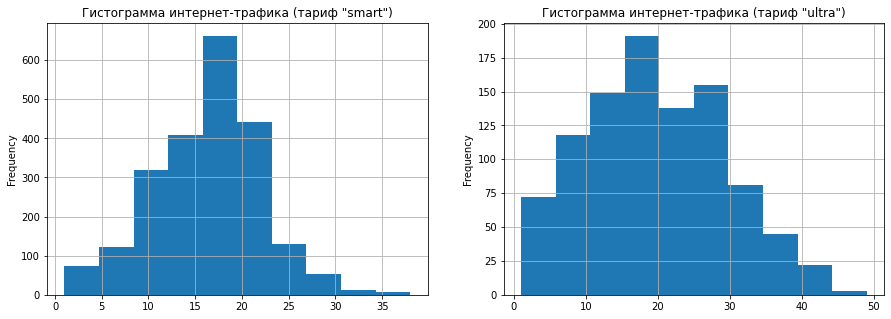

In [42]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

smart_clients['gb_used'].plot(kind='hist', title='Гистограмма интернет-трафика (тариф "smart")', grid=True, ax=axes[0]);
ultra_clients['gb_used'].plot(kind='hist', title='Гистограмма интернет-трафика (тариф "ultra")', grid=True, ax=axes[1]);

<b>smart</b>

Данные по интернет трафику практически распределены <b>нормально</b>, но все равно имеют <b>положительную скошенность</b>. По данной гистограмме видно, что заметная часть пользователей этого тарифа превышают лимит в 15 ГБ и используют интернет-трафик сверх лимита, доплачивая за это оператору.

<b>ultra</b>

Распределение <b>не является нормальным</b>. По данной гистограмме мы можем наблюдать, что некоторые пользователи превышают лимит по интернет трафику (30 ГБ), соответственно, переплачивают за него оператору. Но большинство пользователей укладываются в этот лимит, соответственно, оператору не платят за дополнительный трафик.

В целом, можно сказать, что клиенты тарифа "ultra" в основном укладываются в лимиты по всем услугам, в то время как клиенты тарифа "smart" используют минуты, сообщения, интернет-трафик сверх лимита, за что, соотвественно, доплачивают оператору.

## Проверка гипотез

Так как основная цель проекта - анализ данных с целью выявления более выгодного тарифа, зададим нулевую гипотезу, которая звучит следующим образом: <b>средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается (равны)</b>
    
Гипотезы:
- H0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается (равны)
- H1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Для проверки гипотез используем t-критерий Стьюдента, так как он чаще всего используется для проверки гипотез о равности средних значений в двух выборках. Пороговое значение уровня значимости зададим 0.05

In [43]:
alpha = 0.05

result = st.ttest_ind(smart_clients['overall_profit'], ultra_clients['overall_profit'])

print('p-значение: {}'.format(result.pvalue))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не удалось')

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Уровень значимости получился: 1.42 * 10 ** -160

Соответственно, отвергаем нулевую гипотезу. <b>Можем предположить, что гипотеза H1 верна.</b>

<b>Следующие гипотезы для проверки:</b>

- H0 - средняя выручка пользователей тарифа "Смарт" больше, чем от пользователей тарифа "Ультра"
- H1 - средняя выручка пользователей тарифа "Смарт" меньше, чем от пользователей тарифа "Ультра"

Проверим эту гипотезу с помощью <b>st.ttest_1samp</b>. Интересующее нас значение будет среднее значение выручки пользователей тарифа "Ультра". Пороговое значение уровня значимости зададим 0.05.

In [44]:
alpha = 0.05

interested_value = ultra_clients['overall_profit'].mean()

result = st.ttest_1samp(smart_clients['overall_profit'], interested_value)

print('p-значение: {}'.format(result.pvalue))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не удалось')

p-значение: 3.363519965e-315
Отвергаем нулевую гипотезу


Уровень значимости получился: 3.36 * 10 ** -315

Соответственно, отвергаем нулевую гипотезу. <b>Можем предположить, что гипотеза H1 верна</b> и, действительно, средняя выручка от пользователей тарифа "Смарт" меньше, чем от пользователей тарифа "Ультра".

<b>Следующие гипотезы для проверки:</b>

- H0 - средняя выручка пользователей из Москвы <b>не отличается</b> от выручки пользователей из других регионов
- H1 - средняя выручка пользователей из Москвы <b>отличается</b> от выручки пользователей из других регионов

Для проверки гипотез используем t-критерий Стьюдента, так как он чаще всего используется для проверки гипотез о равности средних значений в двух выборках. Пороговое значение уровня значимости зададим 0.05. Для начала создадим выборки пользователей из Москвы и из других регионов.

In [45]:
moscow_users = c_m_i_by_month.query('city == "Москва"')
other_regions_users = c_m_i_by_month.query('city != "Москва"')

alpha = 0.05

result = st.ttest_ind(moscow_users['overall_profit'], other_regions_users['overall_profit'])

print('p-значение: {}'.format(result.pvalue))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не удалось')

p-значение: 0.5440152911670224
Отвергнуть нулевую гипотезу не удалось


Уровень значимости получился: 0.54. <b>Это дает основания предполагать, что нулевая (H0) гипотеза верна.</b> Вполне вероятно, что пользователи приносят одинаковую выручку что в Москве, что в остальных регионах.

## Общий вывод

<b>1.</b> Изначально, в данных не нашлось дубликатов и пропущенные значения имелись лишь в одном столбце 'churn_date' в датасете 'users'. Этот параметр отображает дату прекращения использования тарифа, если значение пропущено, значит данный клиент все еще пользовался тарифом на момент выгрузки данных.

-------------------------------------------------------------------------------------------------------------------------------

<b>2.</b> Далее, для того, чтобы отслеживать данные с точностью до месяцев, в таблицах calls, internet, messages изменили тип данных в столбцах call_date, session_date, message_date соответственно на тип 'datetime64'. Также в таблице users изменили тип данных столбцов churn_date, reg_date на тип datetime64. В дальнейшем это позволило нам создать столбец 'month' для каждой таблицы.

-------------------------------------------------------------------------------------------------------------------------------

<b>3.</b> При поиске ошибок в данных мы наткнулись на нулевые значения в таблице "calls" в столце "duration" - продолжительность звонка, вероятнее всего это пропущенные звонки, клиент просто не смог дозвониться. Произвели удаление таких данных, так как они изменяют показатели "средней продолжительности разговора" и "медианы продолжительности разговора", а также изменяют количество звонков в целом, что могло отразиться на результатах анализа данных. В данной таблице мы наблюдали "нулевые" сессии - потраченный интернет трафик составлял 0.0. Я считаю, что в действительности такое невозможно, ведь, сессия записывается, когда пользователь запускает какое-либо приложение, использующее интернет. Как правило, такие приложения начинают использовать трафик сразу же после запуска, соответственно, пускай хоть это будет 1 Кбайт, но он будет использован. Использованный трафик не может быть равен 0. Соответственно, посчитал правильным удалить сессии, в которых было использовано 0 инетрнет трафика, ведь такие еще и искажают дальнейшие значения, полученные с помощью анализа данных.

-------------------------------------------------------------------------------------------------------------------------------

<b>4.</b> Подсчет результатов для каждого пользователя производился с помощью отдельных написанных функций, которые в свою очередь возвращали обновленные датафреймы с результатами по каждой услуге и общей выручки.

-------------------------------------------------------------------------------------------------------------------------------

<b>5.</b> Анализ таких значений как среднее количество, дисперсия и стандартное отклонение для каждой услуги (минуты, сообщения, интернет-трафик) показал в основном то, что пользователи тарифа "Ультра", как правило, не превышают тарифные лимиты по всем услугам, в то время как пользователи тарифа "Смарт" иногда превышают лимиты, за что переплачивают оператору.

-------------------------------------------------------------------------------------------------------------------------------

<b>6.</b> Проверка гипотез показала, что:
   - есть основания предполагать, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различается
   - есть основания предполагать, что средняя выручка пользователей тарифа "Смарт" меньше, чем от пользователей тарифа "Ультра"
   - есть основания предполагать, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
   
-------------------------------------------------------------------------------------------------------------------------------
   
<b>Общий вывод:</b>

Тариф "Ультра" является более выгодным даже не смотря на то, что пользователи этого тарифа чаще всего не превышают установленные лимиты по всем услугам. Также выручка не зависит от того, проживает клиент в Москве или в другом регионе.